In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
from pathlib import Path
import numpy as np
from astropy.time import Time
from astropy.io import fits
import astropy.units as u

## Functions

In [2]:
def plot_orders(wave, spec, blaze=None, title=None):
    
    orders = spec.shape[0]

    fig, ax = plt.subplots(5, 6, figsize=(18, 8), dpi=300)
    fig.tight_layout(pad=2.0)

    for i, order in enumerate(range(orders)):
        ax_row = i // 6  # Calculate the row index of the current subplot
        ax_col = i % 6   # Calculate the column index of the current subplot
        
        ax[ax_row, ax_col].plot(wave[order], spec[order], alpha=0.7)

        if blaze is not None:
            ax[ax_row, ax_col].plot(wave[order], blaze[order], alpha=0.7)

        ax[ax_row, ax_col].set_title('Order {}'.format(order))

    # plt.suptitle('H band Blaze Function & telluric-improved')
    plt.suptitle(title)
    # plt.suptitle('K band Blaze Function & telluric-improved \n order 25 ignored, tiny flux')

    plt.tight_layout()
    plt.show()
        

#### Calibration files

Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/GS-CAL20230501/20230430/reduced/SDCH_20230430_0021.stacked.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     112   (2048, 2048)   float32   
Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/GS-CAL20230501/20230430/reduced/SDCK_20230430_0021.stacked.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     112   (2048, 2048)   float32   


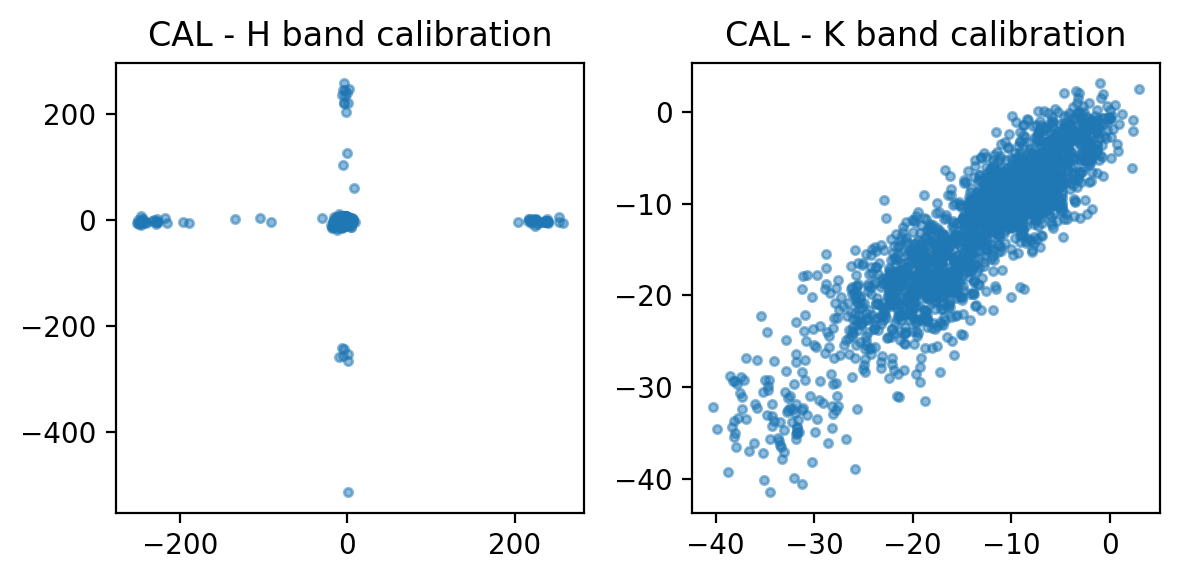

In [3]:
cal_path = Path('/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/GS-CAL20230501/20230430/reduced')

p=cal_path/Path('SDCH_20230430_0021.stacked.fits')
with fits.open(p) as hdu:
    hdu.info()
    h = hdu[0].header
    d1 = hdu[0].data

p=cal_path/Path('SDCK_20230430_0021.stacked.fits')
with fits.open(p) as hdu:
    hdu.info()
    h = hdu[0].header
    d2 = hdu[0].data

x1=d1[0]
y1=d1[1]
x2=d2[0]
y2=d2[1]

f1, ax = plt.subplots(1,2,figsize=(6,3),dpi=200)
ax[0].plot(x1,y1,'.',alpha=0.5)
ax[0].set(title='CAL - H band calibration')
ax[1].plot(x2,y2,'.',alpha=0.5)
ax[1].set(title='CAL - K band calibration')
plt.tight_layout()


Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/SKY-20230501/SDCH_20230501_0021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     112   (2048, 2048)   float32   
Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/SKY-20230501/SDCK_20230501_0021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     112   (2048, 2048)   float32   


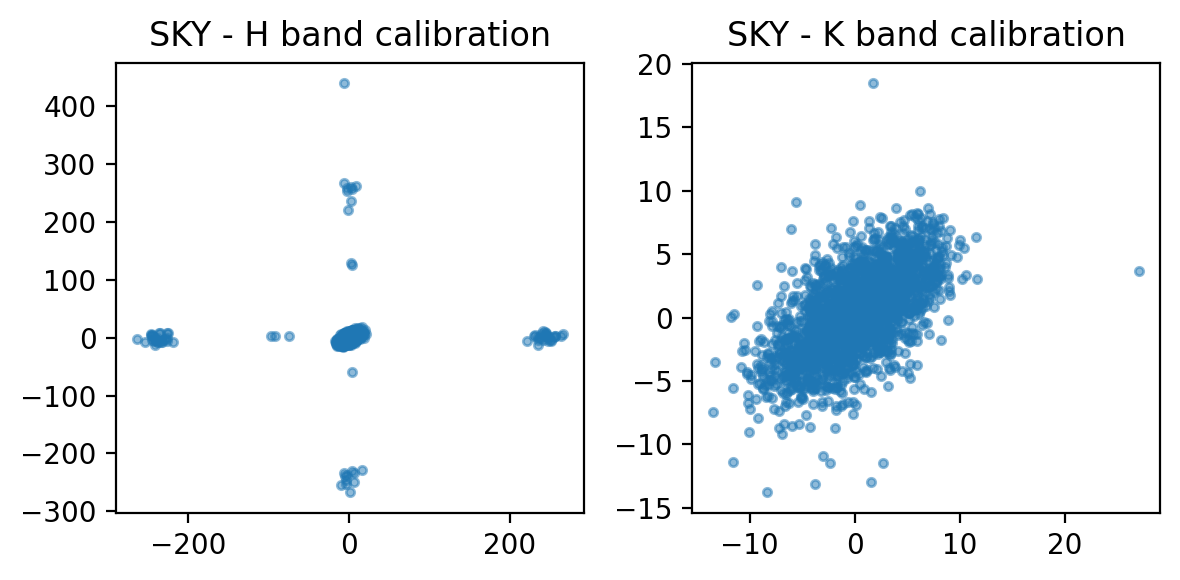

In [4]:
cal_path = Path('/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/SKY-20230501')

p=cal_path/Path('SDCH_20230501_0021.fits')
with fits.open(p) as hdu:
    hdu.info()
    h = hdu[0].header
    d1 = hdu[0].data

p=cal_path/Path('SDCK_20230501_0021.fits')
with fits.open(p) as hdu:
    hdu.info()
    h = hdu[0].header
    d2 = hdu[0].data

x1=d1[0]
y1=d1[1]
x2=d2[0]
y2=d2[1]

f1, ax = plt.subplots(1,2,figsize=(6,3),dpi=200)
ax[0].plot(x1,y1,'.',alpha=0.5)
ax[0].set(title='SKY - H band calibration')
ax[1].plot(x2,y2,'.',alpha=0.5)
ax[1].set(title='SKY - K band calibration')
plt.tight_layout()

## Spectrum files

### H band

In [3]:
path = '/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/GS-2023A-Q-111/20230501/reduced'
# extract the spectrum 2d data
p=path/Path('SDCH_20230501_0022.spec.fits')
with fits.open(p) as hdu:
    hdu.info()
    h = hdu[0].header
    spec_h = hdu[0].data
    wave_h = hdu[1].data

Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/GS-2023A-Q-111/20230501/reduced/SDCH_20230501_0022.spec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     310   (2048, 28)   float32   
  1                1 ImageHDU       204   (2048, 28)   float64   


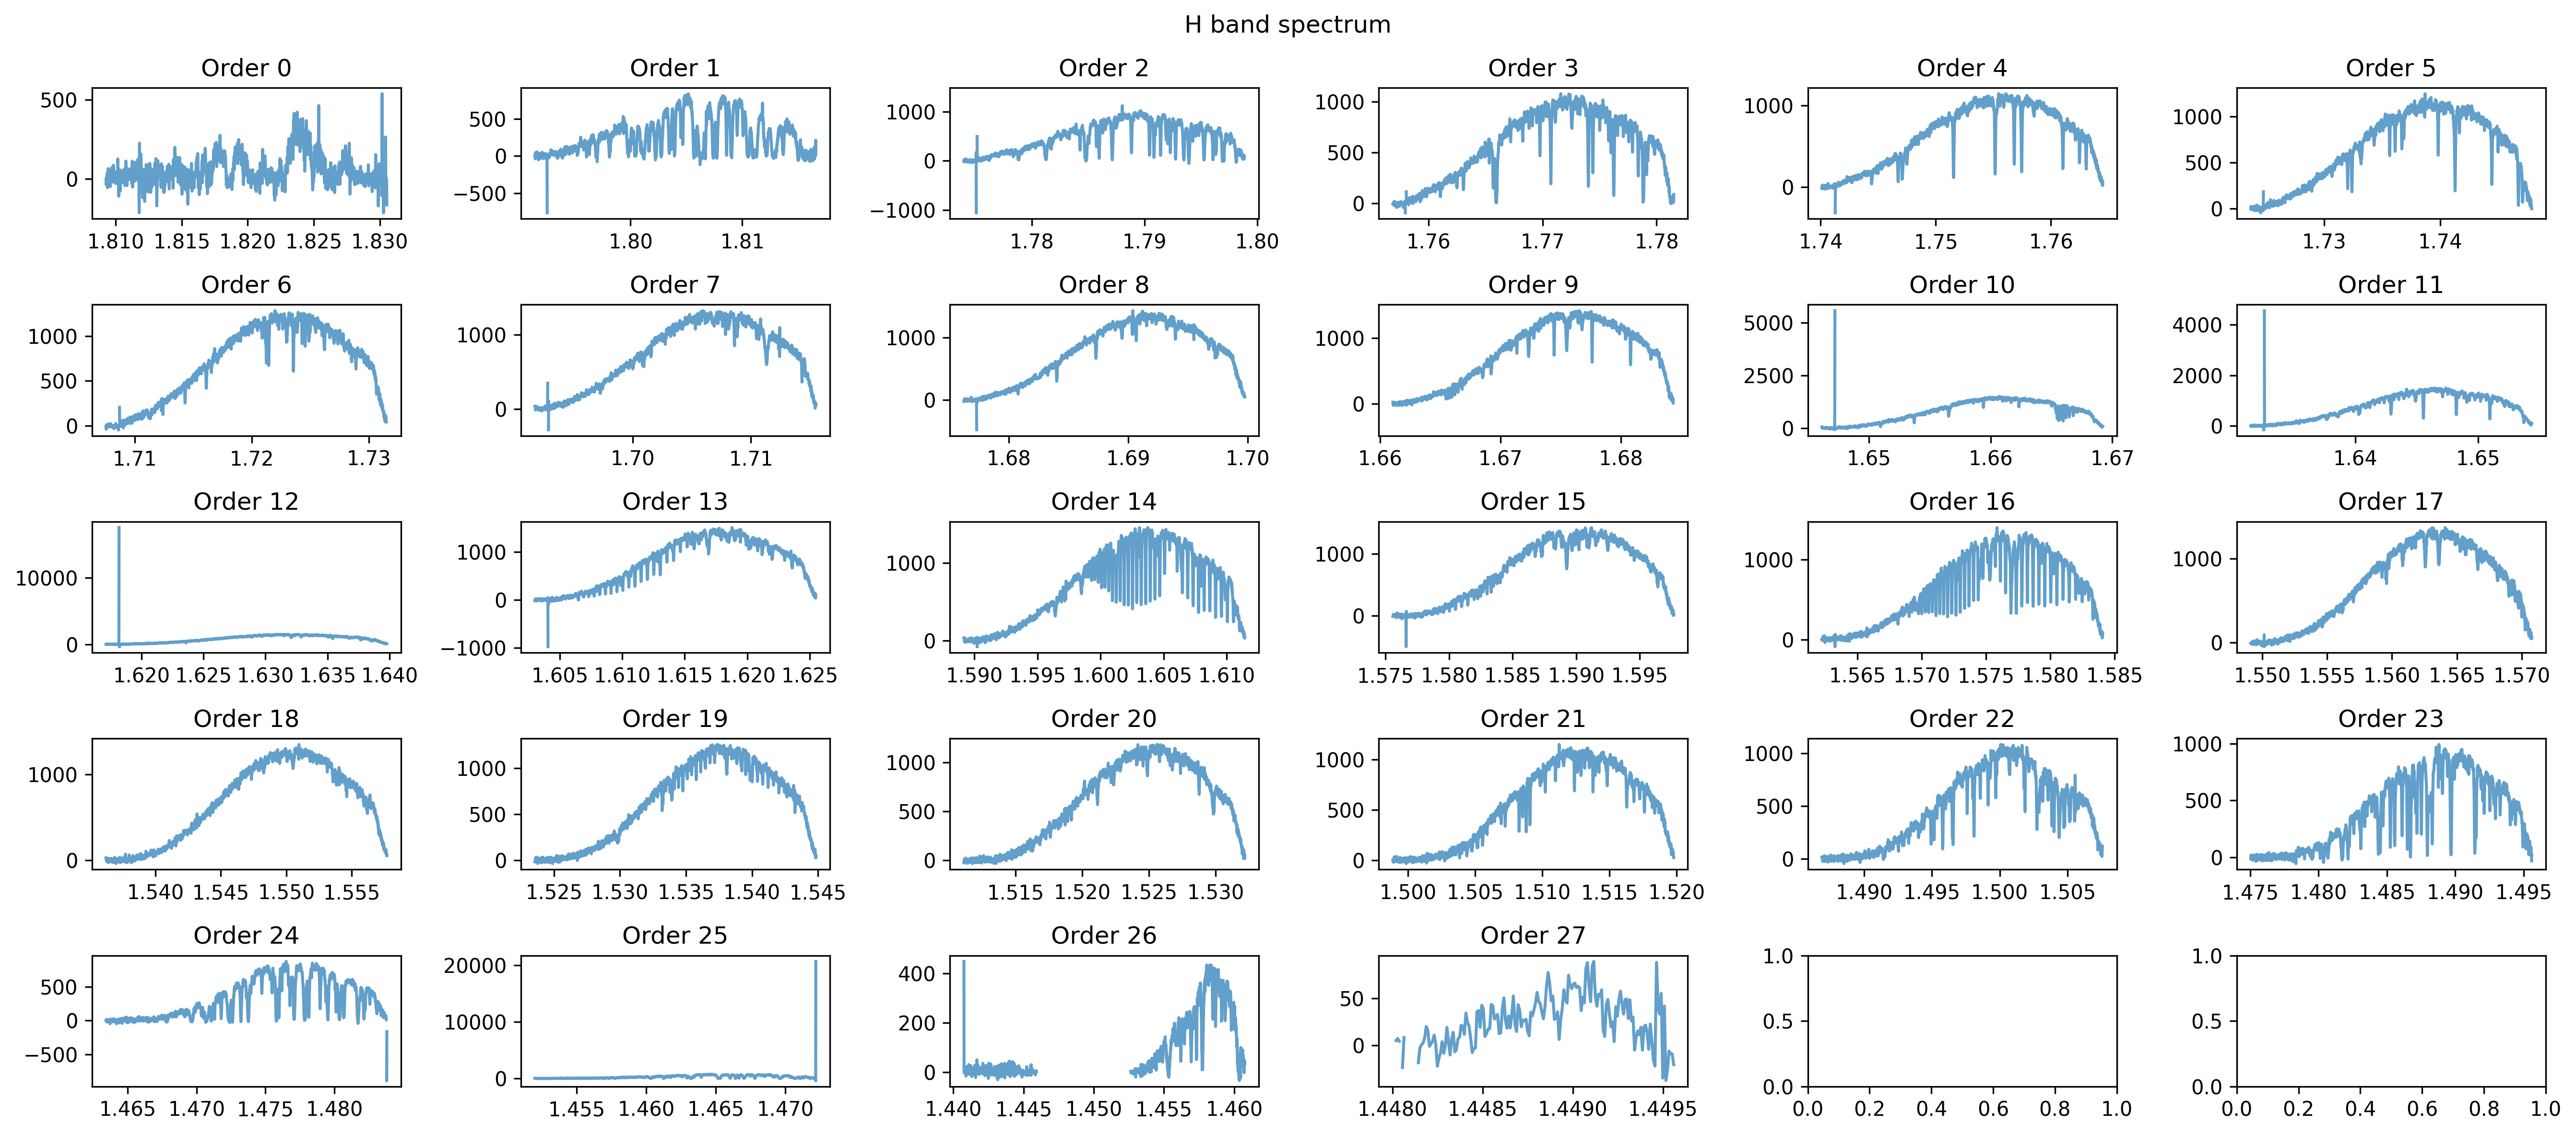

In [6]:
plot_orders(wave_h, spec_h, title='H band spectrum')
# plot_orders(wave_h, spec_h, blaze=h_tc, title='H band spectrum')


### K band

Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/GS-2023A-Q-111/20230501/reduced/SDCK_20230501_0022.spec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     304   (2048, 26)   float32   
  1                1 ImageHDU       198   (2048, 26)   float64   


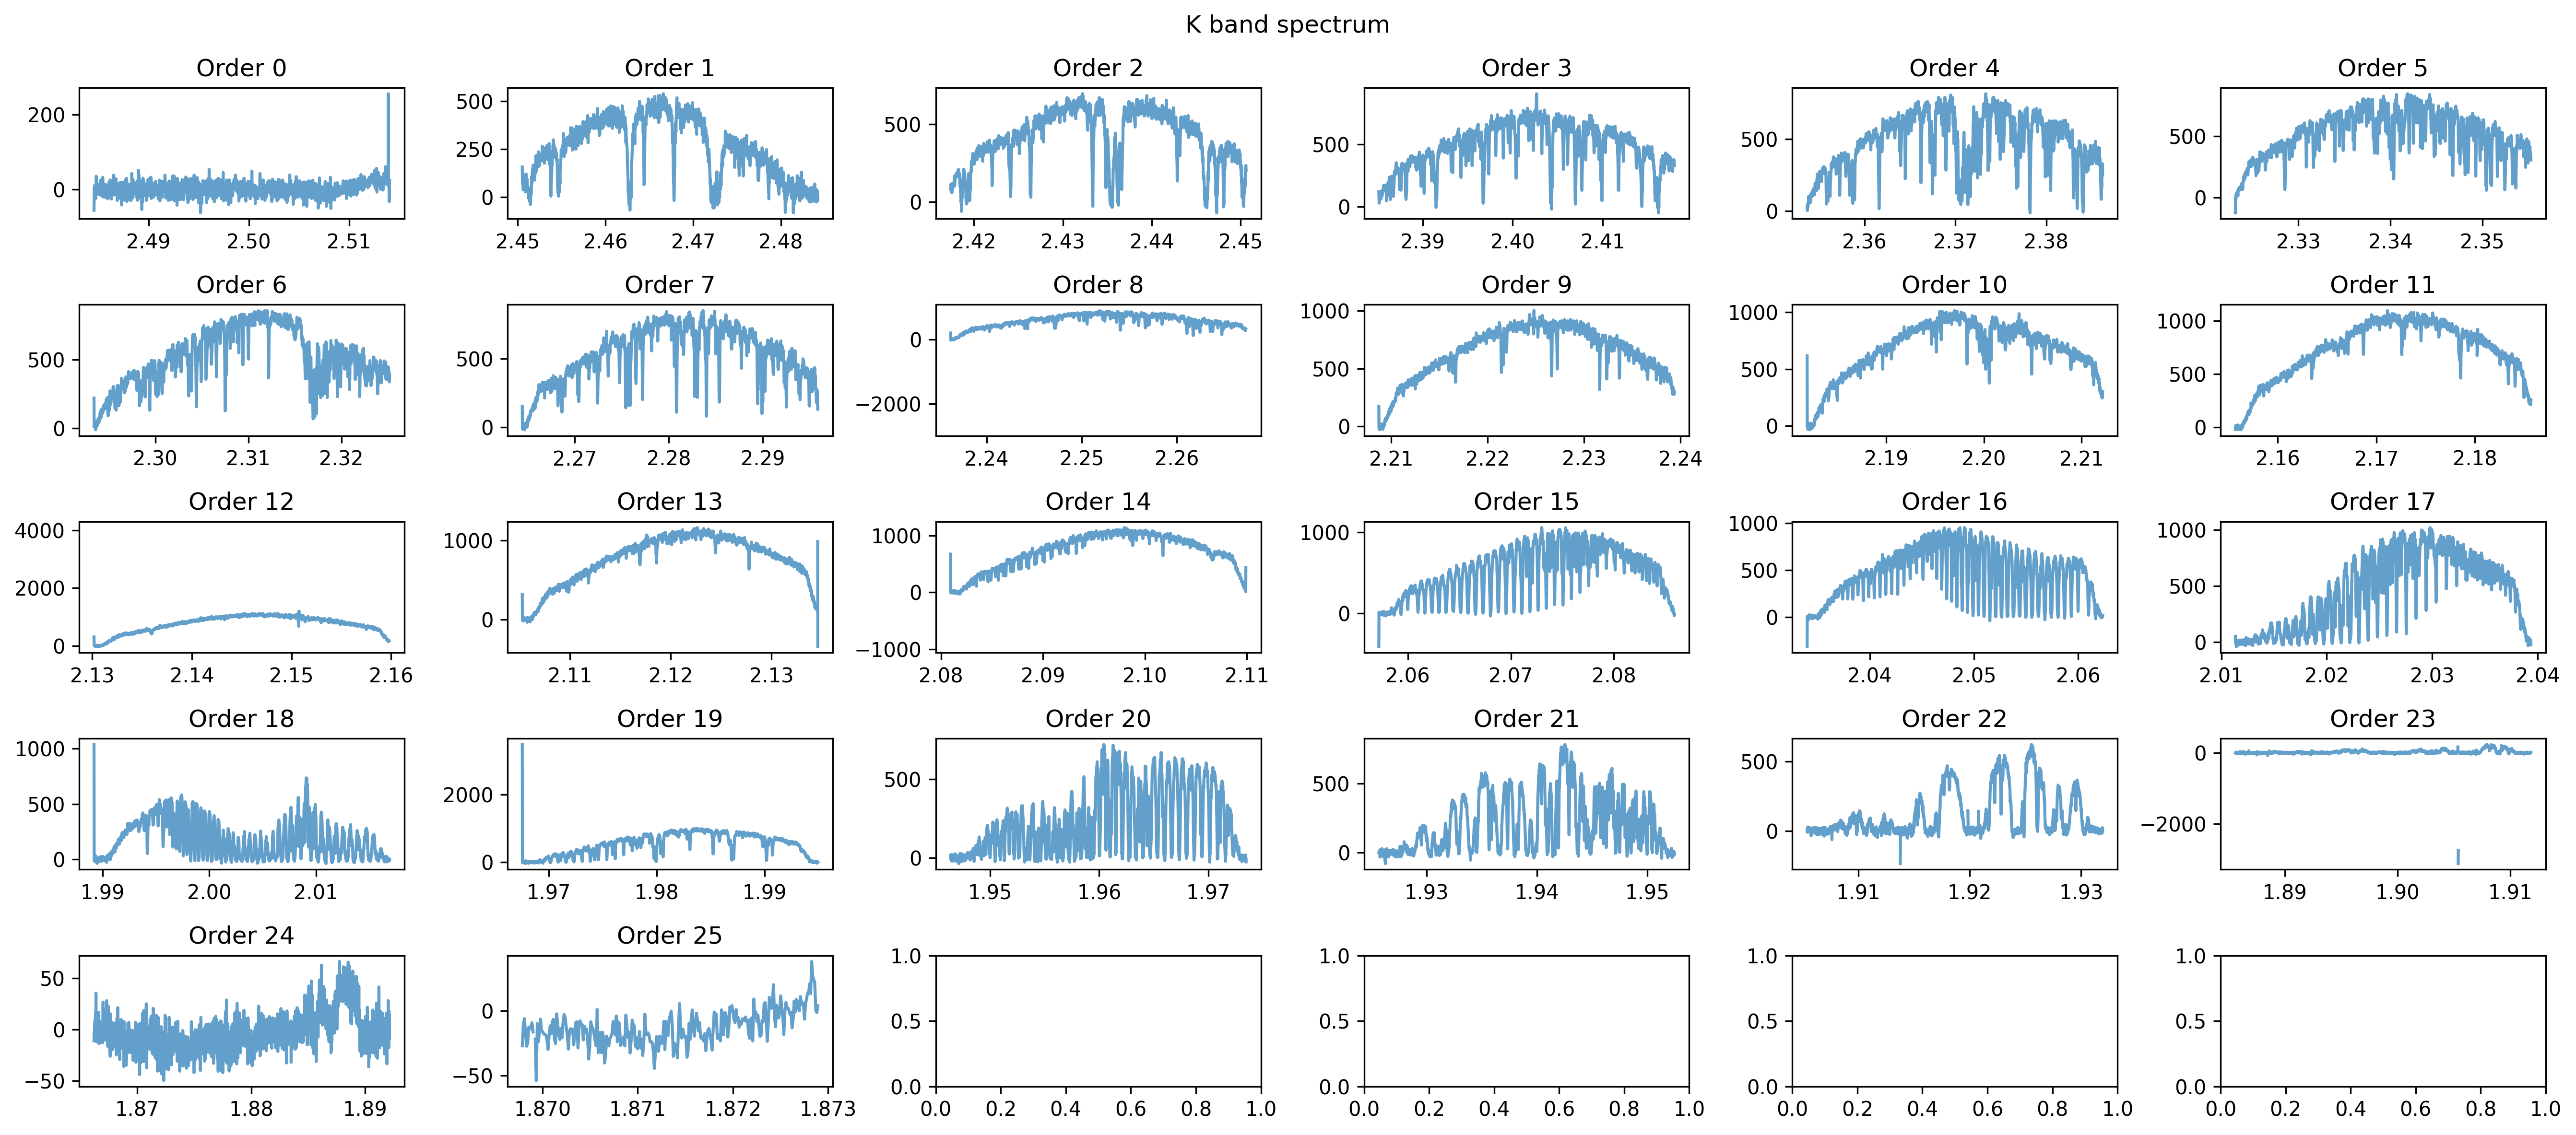

In [7]:
path = '/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/GS-2023A-Q-111/20230501/reduced'
p=path/Path('SDCK_20230501_0022.spec.fits')
with fits.open(p) as hdu:
    hdu.info()
    h = hdu[0].header
    spec_k = hdu[0].data
    wave_k = hdu[1].data

plot_orders(wave_k, spec_k, title='K band spectrum')
# plot_orders(wave_k, spec_k, blaze=k_tc, title='K band spectrum')

## Reduced_..._custom_masking

In [8]:
# Making txt file with list of files to read
# In terminal, 
# ls /home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/GS-2023A-Q-111/20230501/reduced/SDCH_20230501_*.spec.fits > /home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/list_SDCH_spec.txt
# ls /home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/GS-2023A-Q-111/20230501/reduced/SDCK_20230501_*.spec.fits > /home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/list_SDCK_spec.txt

### a0v and Vega

### Blaze function

In [9]:
from astropy.convolution import interpolate_replace_nans, Box1DKernel
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from astropy.convolution import convolve
from scipy.signal import find_peaks

def find_max_continuous_nan(values):
    max_streak = 0
    current_streak = 0

    for value in values:
        if np.isnan(value):
            current_streak += 1
        else:
            max_streak = max(max_streak, current_streak)
            current_streak = 0

    max_streak = max(max_streak, current_streak)

    return max_streak

def find_func(obs, wavelength, order, crop=(None,None), telluric=None, method='find_peaks',low_pass_order=2,conv_box=200,fit_order=8,peak_prominence=0.0001):
    """
    Three methods:
    1. low_pass: Low-pass filter
    2. convolution: Convolution
    3. find_peaks: Find non-signal point and fit a polynomial

    Parameters:
    - obs: ndarray, observation of all order
    - wavelength: ndarray, wavelength of all order
    - order: int, specify which order of the spectrum
    - telluric: 2d array, the result of 1st function call and divide by the blaze function of the corresponding order
    - crop: tuple, specifythe wavelength range you would like to include
    - method: str, specify the method to use (default: 'find_peaks')

    Returns:
    Method 3
    - wave_order: ndarray, the wavelength array of the given order
    - pos: ndarray, index of wavelength where the blaze function should be plotted
    - bl_fit: ndarray, clipped blaze function (y_axis value corresponding to the pos), clipped to ensure no negative value
    """ 

    print('Finding........')
    
    blaze_order = obs[order]  # one order of uncorrected blaze function
    wave_order = wavelength[order]
    wave_order_ori = wavelength[order]

    print('blaze order is ', blaze_order)
    print('wave_order is ', wave_order)

    nan_array = np.full(blaze_order.shape, np.nan)

    my_slice = slice(*crop)
    blaze_order = blaze_order[my_slice]  # one order of uncorrected blaze function
    wave_order = wave_order_ori[my_slice]
    
    # clear the nan in the original blaze function with telluric
    blaze_order_nonan = interpolate_replace_nans(blaze_order, Box1DKernel(find_max_continuous_nan(blaze_order)+1))
    nan_num = np.sum(np.isnan(blaze_order_nonan))

    if nan_num > 0:
        raise ValueError(f"The data contains {nan_num} NaN values. Clean the data before applying the method.")

    if telluric is None:
        telluric = blaze_order_nonan
    else: # telluric function passed
        telluric = telluric[order]
        telluric = telluric[my_slice]
    
    if method == 'low_pass':
        print('LOW-PASS METHOD applied')
        # LOW-PASS FILTER METHOD

        # Assumption variables made for low-pass filter
        freq_samp = 1000  # 1000 samples per second
        dt = 1 / freq_samp  # 0.001 second per sample
        t = np.arange(len(blaze_order)) * dt  # Time array
        period = len(blaze_order) * 2.2 / freq_samp

        order = low_pass_order  # Filter order
        cutoff_freq = 8  # Cutoff frequency (adjust as needed)

        b, a = signal.butter(order, cutoff_freq, btype='lowpass', fs=freq_samp)
        filtered = signal.filtfilt(b, a, blaze_order_nonan)  # Apply the low-pass filter
        filtered = np.clip(filtered, 0, None)

        nan_array[my_slice]=filtered
        
        return wave_order_ori, nan_array

    elif method == 'convolution':
        print('CONVOLUTION METHOD applied')
        # CONVOLUTION METHOD
        conv = convolve(blaze_order_nonan, Box1DKernel(conv_box))
        conv = np.clip(conv, 0, None)

        nan_array[my_slice]=conv

        return wave_order_ori, nan_array

    elif method == 'find_peaks':
        print('FIND PEAK METHOD applied')
        # FIND_PEAKS AND FIT METHOD
        # pos, _ = find_peaks(blaze_order_nonan, prominence=(None, peak_prominence))
        # coeffs = np.polyfit(pos, blaze_order_nonan[pos], fit_order)
        # bl_fit = np.polyval(coeffs, pos)
        
        pos, _ = find_peaks(telluric, prominence=(None, peak_prominence))
        print('position is ', pos)
        coeffs = np.polyfit(wave_order[pos], blaze_order_nonan[pos],fit_order)
        bl_fit = np.polyval(coeffs, wave_order)
        bl_fit = np.clip(bl_fit, 0, None) # perform clip

        nan_array[my_slice]=bl_fit

        return wave_order_ori, nan_array

    else:
        raise ValueError("Invalid method. Choose one of 'low_pass', 'convolution', or 'find_peaks'.")

(array([   0,   86,   87, 2044, 2045, 2046, 2047]),)
347


/home/ldang05/venv/ss-env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


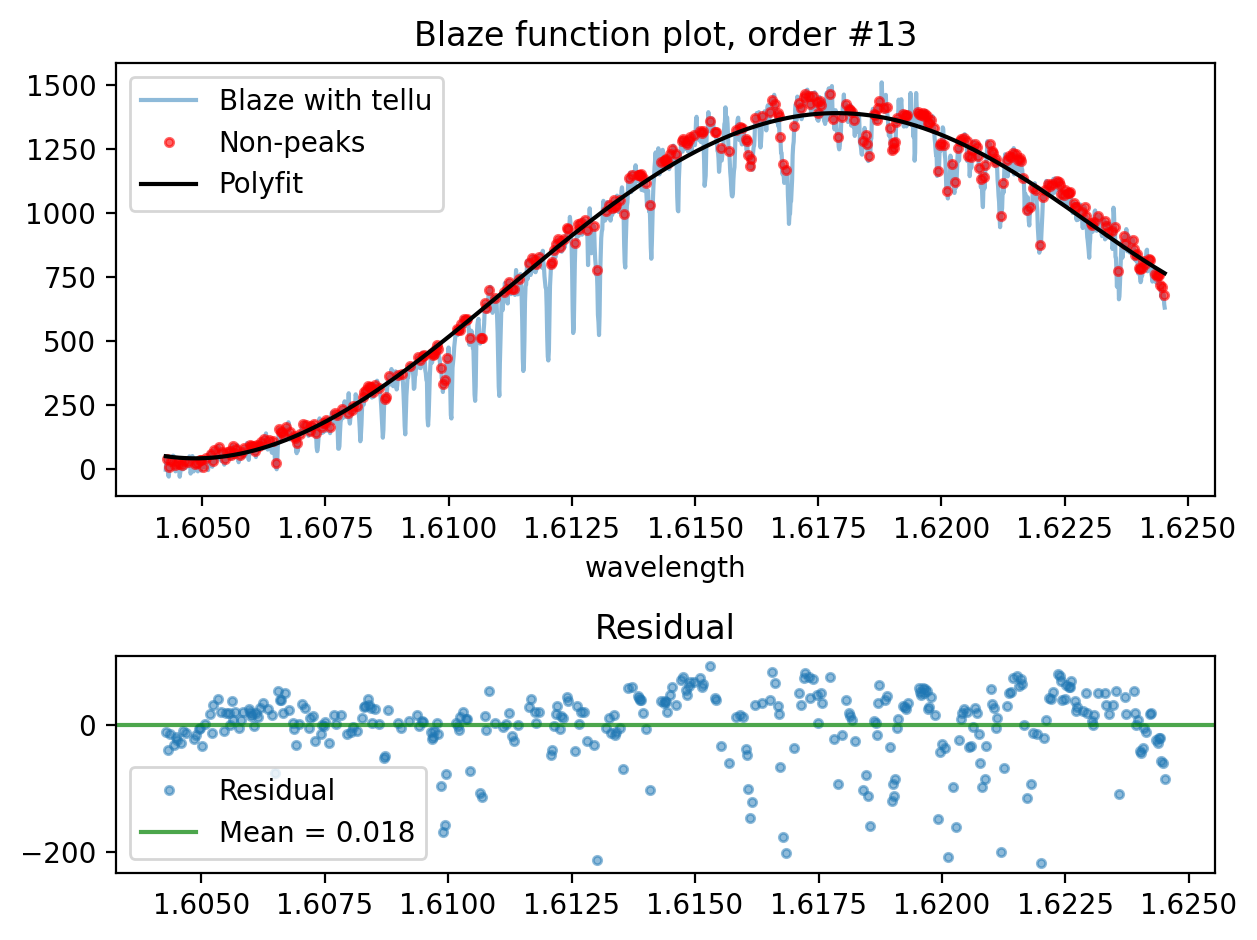

In [47]:
# Test the parameter: e.g. prominence
order=13
blaze_order = spec_h[order] # one order of uncorrected blaze function
wave_order = wave_h[order]
print(np.nonzero(np.isnan(blaze_order)))

blaze_order = blaze_order[100:-100] # one order of uncorrected blaze function
wave_order = wave_order[100:-100]

from astropy.convolution import interpolate_replace_nans, Box1DKernel
blaze_order_nonan = interpolate_replace_nans(blaze_order, Box1DKernel(find_max_continuous_nan(blaze_order)+1))

from scipy.signal import find_peaks
peaks, _ = find_peaks(blaze_order_nonan, prominence=(None, 50)) # peaks returns the position of the peak
coeffs = np.polyfit(wave_order[peaks], blaze_order_nonan[peaks],8)
print(len(peaks))

# Evaluate the polynomial at the generated points
y_fit = np.polyval(coeffs, wave_order)
res = blaze_order_nonan[peaks] - y_fit[peaks]

f1,ax = plt.subplots(2,1,gridspec_kw={'height_ratios': [2, 1]},dpi=200)
ax[0].plot(wave_order, blaze_order_nonan,label='Blaze with tellu',alpha=0.5)
ax[0].plot(wave_order[peaks], blaze_order_nonan[peaks], ".", color='r',label='Non-peaks',alpha=0.6)
ax[0].plot(wave_order,y_fit,color='k',label='Polyfit')
ax[0].set(title='Blaze function plot, order #{}'.format(order),xlabel='wavelength')
ax[0].legend()

ax[1].plot(wave_order[peaks],res, '.', label='Residual',alpha=0.5)
ax[1].axhline(np.mean(res), color='g',label='Mean = {:.3f}'.format(np.mean(res)), alpha=0.7)
ax[1].set_title('Residual')
ax[1].legend()

plt.tight_layout()
plt.show()

In [11]:
path='/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/GS-2023A-Q-111/20230501/reduced'
p=path/Path('SDCH_20230628_0026.spec_a0v.fits')

# H band
with fits.open(p) as hdu:
    hdu.info()
    h = hdu[0].header
    spec = hdu[0].data
    wave = hdu[1].data
    a0v = hdu[3].data
    vega = hdu[4].data

blaze = a0v/vega # H_blaze (blaze with telluric)
H_blaze = blaze

# K band
p=path/Path('SDCK_20230628_0026.spec_a0v.fits')
with fits.open(p) as hdu:
    hdu.info()
    h = hdu[0].header
    spec = hdu[0].data
    K_wave = hdu[1].data
    K_a0v = hdu[3].data
    K_vega = hdu[4].data

K_blaze = K_a0v/K_vega # blaze_obs

Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/GS-2023A-Q-111/20230501/reduced/SDCH_20230628_0026.spec_a0v.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SPEC_DIVIDE_A0V    1 PrimaryHDU     313   (2048, 28)   float64   
  1  WAVELENGTH    1 ImageHDU       312   (2048, 28)   float64   
  2  TGT_SPEC      1 ImageHDU       312   (2048, 28)   float32   
  3  A0V_SPEC      1 ImageHDU       312   (2048, 28)   float32   
  4  VEGA_SPEC     1 ImageHDU       312   (2048, 28)   float64   
  5  SPEC_DIVIDE_CONT    1 ImageHDU       312   (2048, 28)   float64   
Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/GS-2023A-Q-111/20230501/reduced/SDCK_20230628_0026.spec_a0v.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SPEC_DIVIDE_A0V    1 PrimaryHDU     307   (2048, 26)   float64   
  1  WAVELENGTH    1 ImageHDU       306   (2048, 26)   float64   
  2  TGT_SPEC      1 ImageHDU       306   (2048, 26)   float32   
  3 

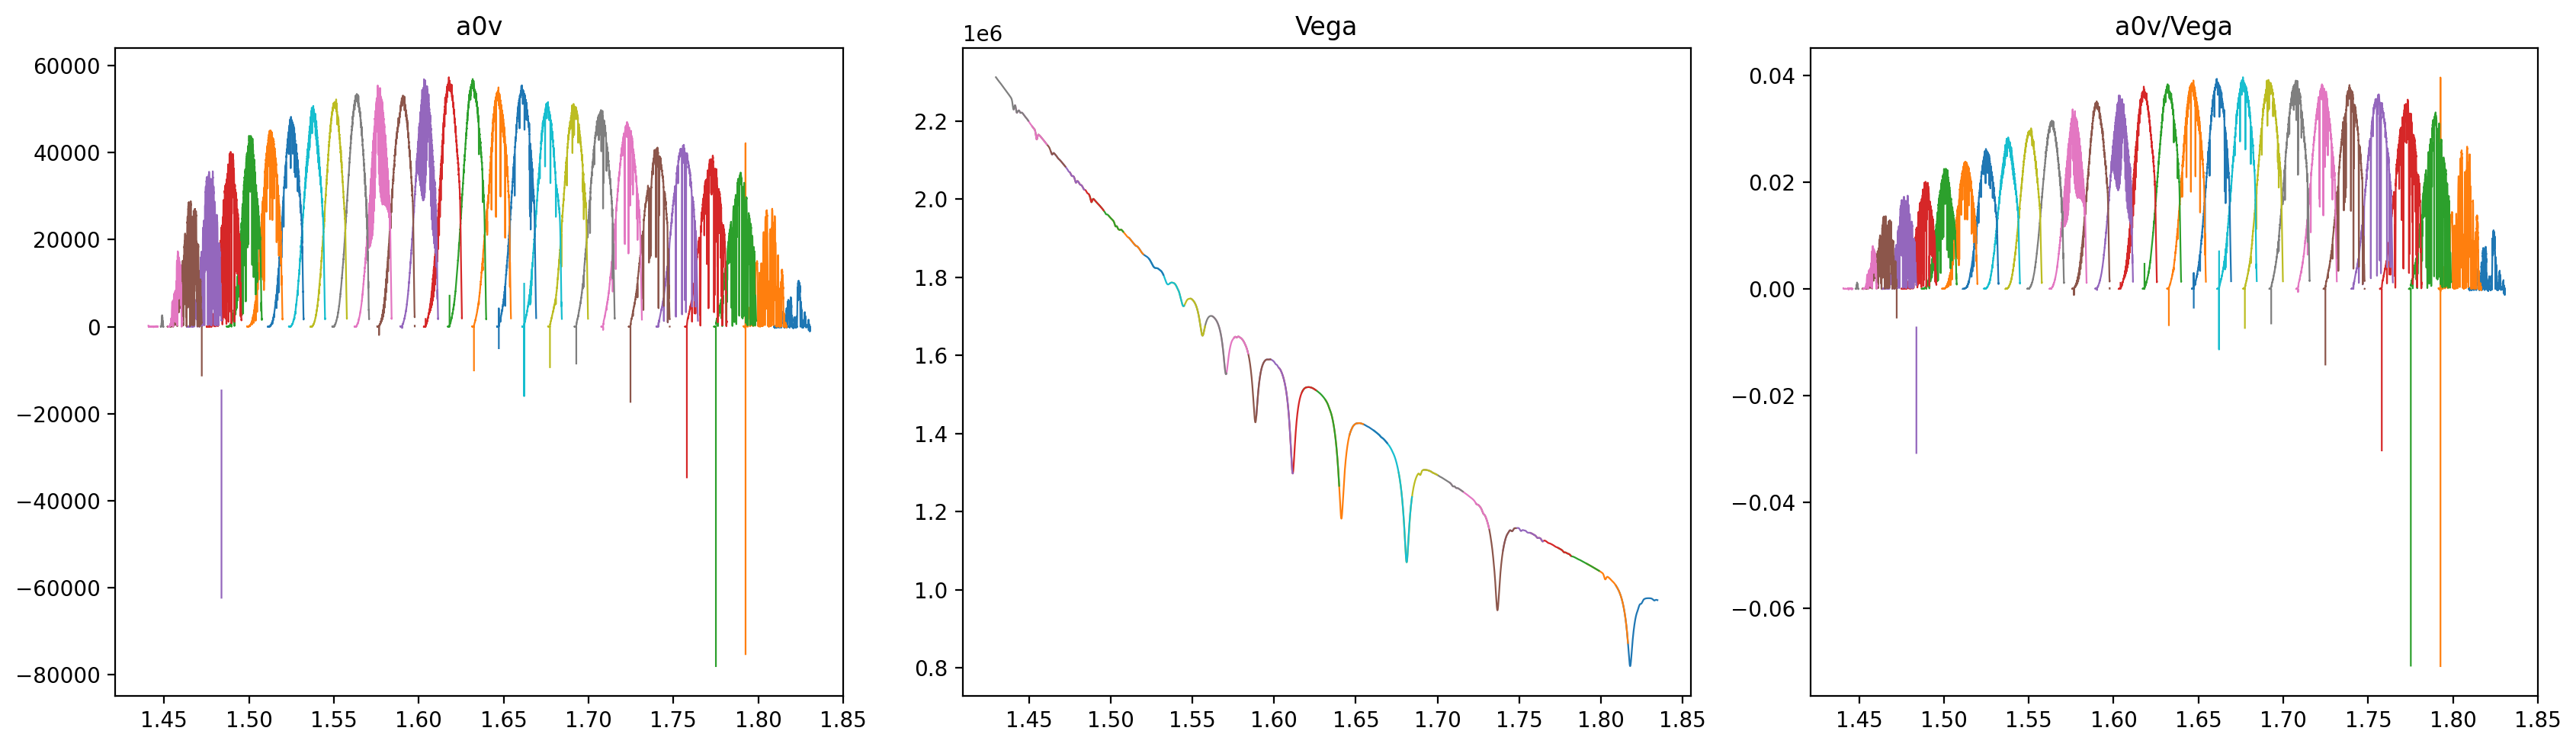

In [30]:
f1, ax = plt.subplots(1,3,figsize=(17,5),dpi=200)
ax[0].plot(wave.T, a0v.T,linewidth=0.8)
ax[0].set_title('a0v')
ax[1].plot(wave.T, vega.T,linewidth=0.8)
ax[1].set_title('Vega')
ax[2].plot(wave.T, H_blaze.T,linewidth=0.8)
ax[2].set_title('a0v/Vega')
plt.tight_layout()

In [48]:
# H band
# blaze_func_arr = np.empty((0, np.shape(spec)[1]));
# orders = range(np.shape(spec)[0])
blaze_func_arr1 = np.empty((0,2048))
blaze_func_arr2 = np.empty((0,2048))
H_orders = range(28)
K_orders = range(26)
crop = (100, -100)

for order in H_orders:
    _, b1 = find_func(spec_h, wave_h, order, crop, telluric=None, peak_prominence=50);
    blaze_func_arr1 = np.vstack((blaze_func_arr1, b1));

for order in K_orders:
    _, b2 = find_func(spec_k, wave_k, order, crop, telluric=None, peak_prominence=50);
    blaze_func_arr2 = np.vstack((blaze_func_arr2, b2));

h_tc = blaze_func_arr1
k_tc = blaze_func_arr2

np.sum(np.isnan(h_tc[0])) # number of nan in the result blaze function in order to match the shape of the wave

Finding........
blaze order is  [        nan -26.82981     3.7311656 ...         nan         nan
         nan]
wave_order is  [1.80925683 1.80927091 1.80928498 ... 1.8346171  1.83462833 1.83463956]
FIND PEAK METHOD applied
position is  [   5   12   20   23   29   36   56   70   73   78   89   94  104  110
  125  133  148  153  156  172  182  201  215  229  232  242  245  252
  254  258  265  269  276  278  291  298  305  312  319  325  328  334
  344  350  358  365  369  372  381  383  386  395  398  400  405  435
  449  454  462  470  484  490  493  499  502  509  516  518  523  528
  540  551  556  564  567  575  578  586  592  594  597  600  603  607
  623  636  638  641  644  650  660  667  671  680  690  698  714  717
  724  734  743  752  754  762  765  787  791  793  803  806  814  818
  821  824  826  833  842  846  856  859  866  879  887  890  900  906
  908  920  922  924  926  928  934  941  946  970  974  988 1004 1014
 1019 1022 1039 1048 1053 1063 1065 1072 1083 1101 110

/tmp/ipykernel_3112178/3639126173.py:11: RankWarning: Polyfit may be poorly conditioned
  _, b1 = find_func(spec_h, wave_h, order, crop, telluric=None, peak_prominence=50);
/tmp/ipykernel_3112178/3639126173.py:11: RankWarning: Polyfit may be poorly conditioned
  _, b1 = find_func(spec_h, wave_h, order, crop, telluric=None, peak_prominence=50);
/tmp/ipykernel_3112178/3639126173.py:11: RankWarning: Polyfit may be poorly conditioned
  _, b1 = find_func(spec_h, wave_h, order, crop, telluric=None, peak_prominence=50);
/tmp/ipykernel_3112178/3639126173.py:11: RankWarning: Polyfit may be poorly conditioned
  _, b1 = find_func(spec_h, wave_h, order, crop, telluric=None, peak_prominence=50);
/tmp/ipykernel_3112178/3639126173.py:11: RankWarning: Polyfit may be poorly conditioned
  _, b1 = find_func(spec_h, wave_h, order, crop, telluric=None, peak_prominence=50);
/tmp/ipykernel_3112178/3639126173.py:11: RankWarning: Polyfit may be poorly conditioned
  _, b1 = find_func(spec_h, wave_h, order, crop

[        nan -55.684696    3.8104093 ...         nan         nan
         nan]
wave_order is  [2.48454952 2.4845681  2.48458668 ... 2.51867846 2.51869344 2.51870842]
FIND PEAK METHOD applied
position is  [   5   10   13   17   19   23   25   28   31   34   38   40   45   47
   53   58   60   62   65   69   71   73   75   81   84   86   88   90
   94   96   98  102  112  116  120  123  126  128  130  134  136  139
  144  147  151  154  157  170  175  178  180  184  186  188  191  194
  197  201  205  214  217  220  223  226  228  230  232  236  240  244
  247  249  253  257  260  265  269  271  274  278  282  291  295  301
  304  308  311  314  317  321  324  328  333  335  345  348  353  361
  363  366  374  376  380  387  392  396  398  401  407  421  423  426
  429  435  443  447  452  454  456  458  461  464  472  474  485  488
  490  492  495  497  502  505  507  510  513  515  517  528  532  539
  541  545  549  553  558  560  563  566  569  573  576  579  581  588
  591  594  597

/tmp/ipykernel_3112178/3639126173.py:15: RankWarning: Polyfit may be poorly conditioned
  _, b2 = find_func(spec_k, wave_k, order, crop, telluric=None, peak_prominence=50);
/tmp/ipykernel_3112178/3639126173.py:15: RankWarning: Polyfit may be poorly conditioned
  _, b2 = find_func(spec_k, wave_k, order, crop, telluric=None, peak_prominence=50);
/tmp/ipykernel_3112178/3639126173.py:15: RankWarning: Polyfit may be poorly conditioned
  _, b2 = find_func(spec_k, wave_k, order, crop, telluric=None, peak_prominence=50);
/tmp/ipykernel_3112178/3639126173.py:15: RankWarning: Polyfit may be poorly conditioned
  _, b2 = find_func(spec_k, wave_k, order, crop, telluric=None, peak_prominence=50);
/tmp/ipykernel_3112178/3639126173.py:15: RankWarning: Polyfit may be poorly conditioned
  _, b2 = find_func(spec_k, wave_k, order, crop, telluric=None, peak_prominence=50);
/tmp/ipykernel_3112178/3639126173.py:15: RankWarning: Polyfit may be poorly conditioned
  _, b2 = find_func(spec_k, wave_k, order, crop

200

In [53]:
# Create separate fits files that contains H band and K band blaze function.

h_primary_hdu = fits.PrimaryHDU(h_tc)
h_hdulist = fits.HDUList([h_primary_hdu])
h_hdulist.writeto(Path('/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/H_blaze_function.fits'), overwrite=True)

k_primary_hdu = fits.PrimaryHDU(k_tc)
k_hdulist = fits.HDUList([k_primary_hdu])
k_hdulist.writeto(Path('/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/K_blaze_function.fits'), overwrite=True)

#### Find best blaze function (since no a0v, select 10 orders by eye and ensemble average)

Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/H_blaze_function.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (2048, 28)   float64   
Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/K_blaze_function.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (2048, 26)   float64   


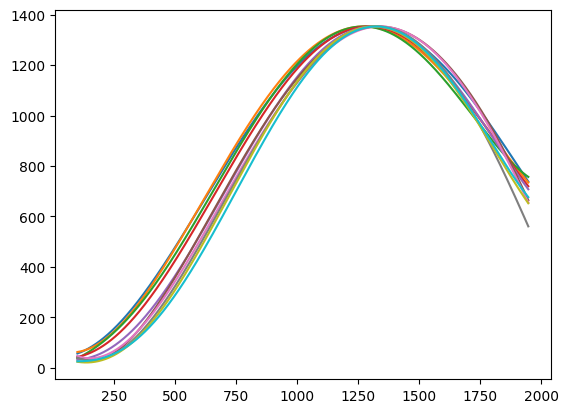

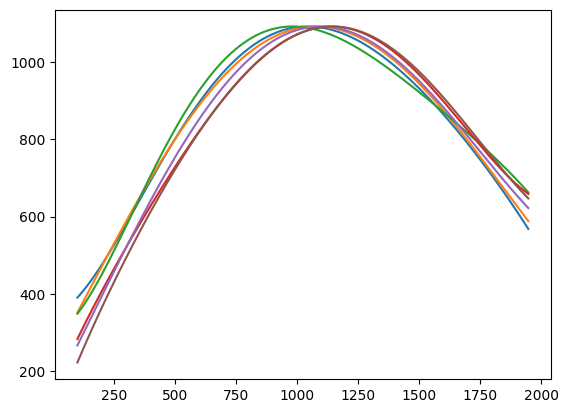

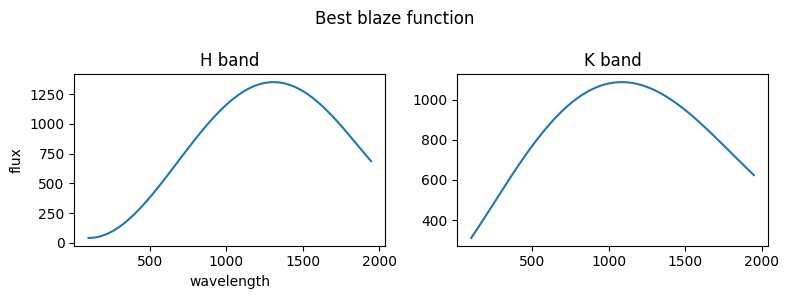

In [55]:
def find_best_blaze(num_order, path, good_idx=None):
    
    with fits.open(path) as hdu:
        hdu.info()
        b=hdu[0].data

    good_blaze = b[good_idx]
    blaze_max = np.nanmax(good_blaze)
    good_blaze = good_blaze/np.nanmax(good_blaze,axis=1)[:,None]
    good_blaze *= blaze_max
    ens_avg = np.mean(good_blaze, axis=0) # shape = (2048,)

    plt.figure()
    plt.plot(good_blaze.T)

    return ens_avg

p=Path('/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/H_blaze_function.fits')
good_idx=[5,6,7,8,14,15,16,17,18,19]
H_best_blaze = find_best_blaze(10,p, good_idx)

p=Path('/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/K_blaze_function.fits')
good_idx=[7,9,10,11,12,13]
K_best_blaze = find_best_blaze(10,p, good_idx)

f1,ax = plt.subplots(1,2,figsize=(8,3))
ax[0].plot(H_best_blaze)
ax[0].set(title='H band', xlabel='wavelength', ylabel='flux')
ax[1].plot(K_best_blaze)
ax[1].set(title='K band')
plt.suptitle('Best blaze function')
plt.tight_layout()

#### Telluric estimate

In [56]:
# H_telluric = H_blaze/H_best_blaze # shape = 28, 2048
# K_telluric = K_blaze/H_best_blaze # shape = 26, 2048

H_bad = [0,1,25,26,27]
K_bad = [0,1,2,4,6,15,16,18,20,21,22,23,24,25]
H_order = list(range(28))
K_order = list(range(26))
H_telluric = np.empty((0,2048))
K_telluric = np.empty((0,2048))

p = '/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/H_blaze_function.fits'
with fits.open(p) as hdu:
    b=hdu[0].data

    for order in H_order:
        if order in H_bad:
            t=spec_h[order]/H_best_blaze
            H_telluric = np.vstack((H_telluric, t))
        else:
            t = spec_h[order]/b[order]
            H_telluric = np.vstack((H_telluric, t))


p = '/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/K_blaze_function.fits'
with fits.open(p) as hdu:
    b=hdu[0].data

    for order in K_order:
        if order in K_bad:
            t=spec_k[order]/K_best_blaze
            K_telluric = np.vstack((K_telluric, t))
        else:
            t = spec_k[order]/b[order]
            K_telluric = np.vstack((K_telluric, t))# H_telluric = H_blaze/H_best_blaze # shape = 28, 2048


/tmp/ipykernel_3112178/1318188129.py:20: RuntimeWarning: divide by zero encountered in divide
  t = spec_h[order]/b[order]


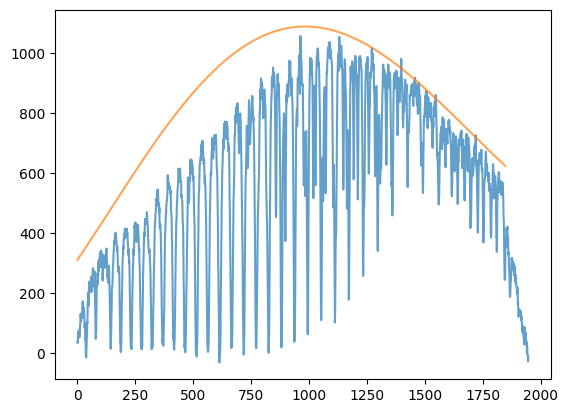

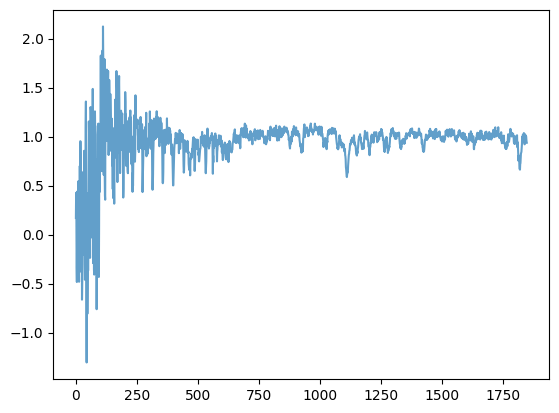

In [60]:
plt.figure()
# plt.plot(spec_h[14],alpha=0.7)
plt.plot(spec_k[15][100:],alpha=0.7)
plt.plot(K_best_blaze[100:],alpha=0.7)

plt.figure()
plt.plot(H_telluric[15][100:],alpha=0.7)

In [61]:
# Create separate fits files that contains H band and K band blaze function.

h_primary_hdu = fits.PrimaryHDU(H_telluric)

h_hdulist = fits.HDUList([h_primary_hdu])
h_hdulist.writeto(Path('/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/H_tellu_recon.fits'), overwrite=True)

k_primary_hdu = fits.PrimaryHDU(K_telluric)
k_hdulist = fits.HDUList([k_primary_hdu])
k_hdulist.writeto(Path('/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/K_tellu_recon.fits'), overwrite=True)

### Blaze function with telluric improvement

In [62]:
# H band
# blaze_func_arr = np.empty((0, np.shape(spec)[1]));
# orders = range(np.shape(spec)[0])
blaze_func_arr1 = np.empty((0,2048))
blaze_func_arr2 = np.empty((0,2048))
H_orders = range(28)
K_orders = range(26)
crop = (100, -100)

for order in H_orders:
    _, b1 = find_func(spec_h, wave_h, order, crop, telluric=H_telluric, peak_prominence=50);
    blaze_func_arr1 = np.vstack((blaze_func_arr1, b1));

for order in K_orders:
    _, b2 = find_func(spec_k, wave_k, order, crop, telluric=K_telluric, peak_prominence=50);
    blaze_func_arr2 = np.vstack((blaze_func_arr2, b2));

h_tc = blaze_func_arr1
k_tc = blaze_func_arr2

np.sum(np.isnan(h_tc[0]))

Finding........
blaze order is  [        nan -26.82981     3.7311656 ...         nan         nan
         nan]
wave_order is  [1.80925683 1.80927091 1.80928498 ... 1.8346171  1.83462833 1.83463956]
FIND PEAK METHOD applied
position is  [   2    5    9   12   17   20   23   26   29   33   36   39   44   49
   54   56   62   68   70   73   75   78   84   89   92   94   99  104
  108  110  115  118  121  125  129  133  139  142  148  151  153  156
  159  163  169  172  175  182  186  191  196  201  206  209  212  215
  221  224  229  232  235  239  242  245  248  252  254  258  261  265
  269  274  276  278  282  287  291  295  298  303  305  309  312  315
  319  321  325  328  331  334  338  344  347  350  355  358  361  365
  369  372  377  381  383  386  390  395  398  400  405  409  413  419
  426  430  435  438  442  446  449  454  456  462  467  470  475  478
  484  487  490  493  499  502  505  509  513  516  518  521  523  526
  528  531  536  540  543  547  551  553  556  559  56

/tmp/ipykernel_3112178/1988168324.py:11: RankWarning: Polyfit may be poorly conditioned
  _, b1 = find_func(spec_h, wave_h, order, crop, telluric=H_telluric, peak_prominence=50);
/tmp/ipykernel_3112178/1988168324.py:11: RankWarning: Polyfit may be poorly conditioned
  _, b1 = find_func(spec_h, wave_h, order, crop, telluric=H_telluric, peak_prominence=50);
/tmp/ipykernel_3112178/1988168324.py:11: RankWarning: Polyfit may be poorly conditioned
  _, b1 = find_func(spec_h, wave_h, order, crop, telluric=H_telluric, peak_prominence=50);
/tmp/ipykernel_3112178/1988168324.py:11: RankWarning: Polyfit may be poorly conditioned
  _, b1 = find_func(spec_h, wave_h, order, crop, telluric=H_telluric, peak_prominence=50);
/tmp/ipykernel_3112178/1988168324.py:11: RankWarning: Polyfit may be poorly conditioned
  _, b1 = find_func(spec_h, wave_h, order, crop, telluric=H_telluric, peak_prominence=50);
/tmp/ipykernel_3112178/1988168324.py:11: RankWarning: Polyfit may be poorly conditioned
  _, b1 = find_fu

Finding........
blaze order is  [       nan        nan        nan ... -18.584297   3.674912  -5.198421]
wave_order is  [2.45045478 2.45047311 2.45049144 ... 2.48418378 2.48419859 2.4842134 ]
FIND PEAK METHOD applied
position is  [   5    7    9   15   20   24   29   32   36   40   43   45   47   49
   56   58   60   65   68   70   72   77   79   86   89   92   96   98
  101  103  108  111  114  116  118  122  127  129  133  135  139  143
  148  150  155  161  165  168  170  172  177  179  181  185  187  190
  194  200  208  214  216  220  223  225  227  229  233  235  238  244
  247  249  253  259  261  265  269  272  280  283  286  292  294  299
  302  305  307  310  313  316  322  324  326  330  333  335  338  341
  344  347  349  352  354  359  361  364  371  373  375  377  380  383
  386  389  392  396  399  403  405  409  411  414  416  418  423  426
  430  433  438  441  444  446  448  451  456  458  460  466  469  474
  476  480  483  487  490  493  496  498  501  504  509  511 

/tmp/ipykernel_3112178/1988168324.py:15: RankWarning: Polyfit may be poorly conditioned
  _, b2 = find_func(spec_k, wave_k, order, crop, telluric=K_telluric, peak_prominence=50);
/tmp/ipykernel_3112178/1988168324.py:15: RankWarning: Polyfit may be poorly conditioned
  _, b2 = find_func(spec_k, wave_k, order, crop, telluric=K_telluric, peak_prominence=50);
/tmp/ipykernel_3112178/1988168324.py:15: RankWarning: Polyfit may be poorly conditioned
  _, b2 = find_func(spec_k, wave_k, order, crop, telluric=K_telluric, peak_prominence=50);
/tmp/ipykernel_3112178/1988168324.py:15: RankWarning: Polyfit may be poorly conditioned
  _, b2 = find_func(spec_k, wave_k, order, crop, telluric=K_telluric, peak_prominence=50);
/tmp/ipykernel_3112178/1988168324.py:15: RankWarning: Polyfit may be poorly conditioned
  _, b2 = find_func(spec_k, wave_k, order, crop, telluric=K_telluric, peak_prominence=50);
/tmp/ipykernel_3112178/1988168324.py:15: RankWarning: Polyfit may be poorly conditioned
  _, b2 = find_fu

200

In [67]:
# Create separate fits files that contains H band and K band blaze function.

h_primary_hdu = fits.PrimaryHDU(h_tc)
h_hdulist = fits.HDUList([h_primary_hdu])
h_hdulist.writeto(Path('/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/H_telluric_corr.fits'), overwrite=True)

k_primary_hdu = fits.PrimaryHDU(k_tc)
k_hdulist = fits.HDUList([k_primary_hdu])
k_hdulist.writeto(Path('/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/K_telluric_corr.fits'), overwrite=True)

### Combine spectra of H and K band

In [1]:
path='/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/'

In [5]:
# Read the first text file containing file paths
with open(path/Path('list_SDCH_spec.txt'), 'r') as file1:
    file_paths1 = file1.read().splitlines()

# Read the second text file containing file paths
with open(path/Path('list_SDCK_spec.txt'), 'r') as file2:
    file_paths2 = file2.read().splitlines()

# Iterate over the file paths and stack the FITS data
for path1, path2 in zip(file_paths1, file_paths2):
    # Open the first FITS file and extract data
    exp_time = path1[-14:]
    filename = f'/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/COMBINED_HK_SPEC/{exp_time}'

    with fits.open(path1) as fits_file1:
        # fits_file1.info()
        data1 = fits_file1[0].data
        wv1 = fits_file1[1].data
        header1 = fits_file1[0].header  # Get the header of path1

    # Open the second FITS file and extract data
    with fits.open(path2) as fits_file2:
        data2 = fits_file2[0].data
        wv2 = fits_file2[1].data

    # Stack the data from both files
    combined_data = np.vstack((data1, data2))
    combined_wv = np.vstack((wv1, wv2))

    # Save the combined data as a new FITS file
    primary_hdu = fits.PrimaryHDU(combined_data, header=header1)
    wv_hdu = fits.ImageHDU(combined_wv)

    hdul = fits.HDUList([primary_hdu, wv_hdu])
    hdul.writeto(filename, overwrite=True)

    # Append the new FITS file path to another text file
    with open(path/Path('list_SDCHK_spec.txt'), 'a') as combined_files:
        combined_files.write(filename + '\n')

In [7]:
# Check one combined fits file

with fits.open('/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/COMBINED_HK_SPEC/0022.spec.fits') as fits_file:
    # Access the header or data as needed
    fits_file.info()
    header = fits_file[0].header
    data = fits_file[0].data
    wv = fits_file[1].data

    # Perform any desired checks or analysis on the FITS file
    print("FITS file information:")
    print(header)
    print("Data shape:", data.shape)

Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/COMBINED_HK_SPEC/0022.spec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     310   (2048, 54)   float32   
  1                1 ImageHDU         7   (2048, 54)   float64   
FITS file information:
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 2048                                                  NAXIS2  =                   54                                                  EXTEND  =                    T                                                  I_HDRVER= '0.995   '           / version of IGRINS FITS Header                  OBSERVAT= 'Gemini Observatory' / Name of the observatory                        TELESCOP= 'Gemini South'       / Name of the 

### Combine blaze function of H and K band

In [9]:
path='/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/'

In [10]:
# Open the first FITS file
fits_file1 = fits.open(path/Path('H_telluric_corr.fits'))
data1 = fits_file1[0].data
print(np.shape(data1))

# Open the second FITS file
fits_file2 = fits.open(path/Path('K_telluric_corr.fits'))
data2 = fits_file2[0].data
print(np.shape(data2))

# Combine the data from both files
combined_data = np.vstack((data1, data2))
print(np.shape(combined_data))

# Create a new FITS file and save the combined data
combined_hdu = fits.PrimaryHDU(combined_data)
combined_hdulist = fits.HDUList([combined_hdu])
combined_hdulist.writeto(path/Path('HK_tellu_corrected_blaze_func.fits'), overwrite=True)

# Close the opened FITS files
fits_file1.close()
fits_file2.close()

(28, 2048)
(26, 2048)
(54, 2048)


In [11]:
# check saved fits file
p = path/Path('HK_tellu_corrected_blaze_func.fits')

with fits.open(p) as hdu:
    hdu.info()
    d = hdu[0].data
    print(np.shape(d))

Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/HK_tellu_corrected_blaze_func.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (2048, 54)   float64   
(54, 2048)


In [ ]:
# Telluric reconstruction path use WASP-77 one.
# '/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/HK_list_tellu_recon.txt'

#### Determine how to choose the post-eclipse observing window: consecutive phases or same phase